In [21]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [22]:
data_path = os.getcwd() + "\Data\Transformed_Data\defenders_correlated.csv"

df = pd.read_csv(data_path)
df.head()

Season                 name position     team  total_points  bps  \
0  2021-22  Alex Nicolao Telles      DEF  Man Utd             1   12   
1  2021-22            Luke Shaw      DEF  Man Utd             0    0   
2  2021-22       William Saliba      DEF  Arsenal             0    0   
3  2021-22       Kieran Tierney      DEF  Arsenal             0    0   
4  2021-22    Takehiro Tomiyasu      DEF  Arsenal             1   11   

   clean_sheets  bonus  influence  ict_index  minutes  goals_scored  threat  \
0             0      0       13.8        4.4       90             0     4.0   
1             0      0        0.0        0.0        0             0     0.0   
2             0      0        0.0        0.0        0             0     0.0   
3             0      0        0.0        0.0        0             0     0.0   
4             0      0       13.2        3.2       90             0     0.0   

   assists  creativity  value  selected  
0        0        26.3     50      9011  
1        0         0.0     51   1315061  
2        0         0.0     45       214  
3        0         0.0     47    323534  
4        0        18.4     46    329334

<AxesSubplot:>

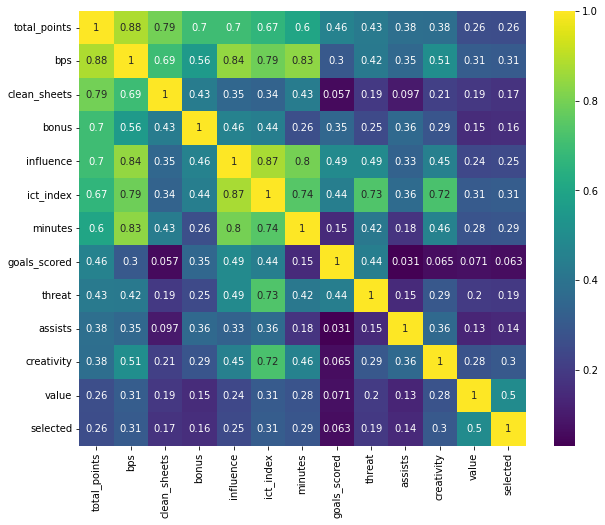

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29342 entries, 0 to 29341
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Season        29342 non-null  object 
 1   name          29342 non-null  object 
 2   position      29342 non-null  object 
 3   team          29342 non-null  object 
 4   total_points  29342 non-null  int64  
 5   bps           29342 non-null  int64  
 6   clean_sheets  29342 non-null  int64  
 7   bonus         29342 non-null  int64  
 8   influence     29342 non-null  float64
 9   ict_index     29342 non-null  float64
 10  minutes       29342 non-null  int64  
 11  goals_scored  29342 non-null  int64  
 12  threat        29342 non-null  float64
 13  assists       29342 non-null  int64  
 14  creativity    29342 non-null  float64
 15  value         29342 non-null  int64  
 16  selected      29342 non-null  int64  
dtypes: float64(4), int64(9), object(4)
memory usage: 3.8+ MB


In [25]:
df.describe().T

count           mean            std   min     25%      50%  \
total_points  29342.0       1.497137       2.634794  -7.0     0.0      0.0   
bps           29342.0       7.971542      10.217063 -12.0     0.0      0.0   
clean_sheets  29342.0       0.131757       0.338232   0.0     0.0      0.0   
bonus         29342.0       0.114478       0.486009   0.0     0.0      0.0   
influence     29342.0       9.139888      12.354807   0.0     0.0      0.0   
ict_index     29342.0       1.649370       2.371815   0.0     0.0      0.0   
minutes       29342.0      40.592529      43.578193   0.0     0.0      0.0   
goals_scored  29342.0       0.019733       0.142711   0.0     0.0      0.0   
threat        29342.0       3.421682       8.689905   0.0     0.0      0.0   
assists       29342.0       0.030332       0.181917   0.0     0.0      0.0   
creativity    29342.0       3.912780       9.023725   0.0     0.0      0.0   
value         29342.0      47.699509       6.381404  38.0    43.0     45.0   
selected      29342.0  180798.610320  363503.450494   0.0  9392.0  42376.0   

                   75%        max  
total_points       2.0       24.0  
bps               15.0       75.0  
clean_sheets       0.0        1.0  
bonus              0.0        3.0  
influence         16.8       93.4  
ict_index          2.7       22.8  
minutes           90.0       90.0  
goals_scored       0.0        2.0  
threat             2.0      152.0  
assists            0.0        3.0  
creativity         1.9      102.6  
value             51.0       80.0  
selected      177898.5  3960716.0

Let's look at the distribution of total points.

C:\Users\GV147BE\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_points', ylabel='Density'>

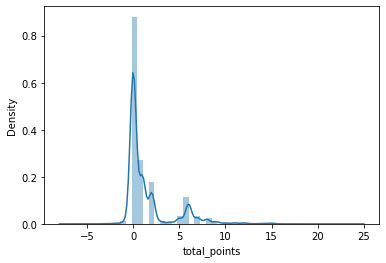

In [26]:
sns.distplot(df['total_points'])

We can see that there are a large amount of 0 total_points entries, we need to check if this is because they did not play any minutes.

In [27]:
print('Not Played: ', len(df[df['minutes']==0]))
print('Played: ', len(df[df['minutes']!=0]))
print('% Not Played: ', len(df[df['minutes']==0])/len(df)*100,'%')

Not Played:  14697
Played:  14645
% Not Played:  50.08861018335492 %


We need to remove 50.1% of our data points... not good!

In [28]:
df = df[df['minutes']!=0]
df.head()

Season                       name position     team  total_points  bps  \
0   2021-22        Alex Nicolao Telles      DEF  Man Utd             1   12   
4   2021-22          Takehiro Tomiyasu      DEF  Arsenal             1   11   
6   2021-22              Harry Maguire      DEF  Man Utd             1   14   
14  2021-22            Victor Lindelöf      DEF  Man Utd             1   16   
16  2021-22  José Diogo Dalot Teixeira      DEF  Man Utd             1   18   

    clean_sheets  bonus  influence  ict_index  minutes  goals_scored  threat  \
0              0      0       13.8        4.4       90             0     4.0   
4              0      0       13.2        3.2       90             0     0.0   
6              0      0       24.0        3.4       90             0     8.0   
14             0      0       18.0        3.6       90             0    17.0   
16             0      0       18.8        3.1       90             0     9.0   

    assists  creativity  value  selected  
0         0        26.3     50      9011  
4         0        18.4     46    329334  
6         0         1.8     54    401476  
14        0         1.0     48     41053  
16        0         3.0     44      6419

C:\Users\GV147BE\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_points', ylabel='Density'>

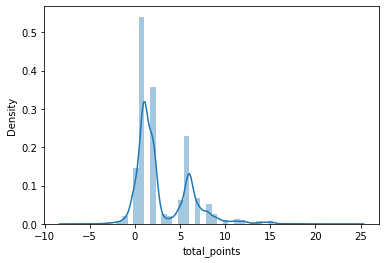

In [29]:
#let's look at our dist plot again
sns.distplot(df['total_points'])

In [30]:
df['total_points'].value_counts().sort_values()

 20       1
 19       1
 24       1
-7        1
-6        1
 16       4
 21       4
-4        5
 17       7
 18       8
 13      20
-3       27
 14      58
-2       62
 15      75
 10      93
 12     102
 11     105
 4      184
-1      199
 3      231
 9      235
 8      467
 5      576
 7      621
 0     1322
 6     2080
 2     3245
 1     4910
Name: total_points, dtype: int64

We can see that the most frequent score for a goalkeeper is 2 points.

Let's investigate the relationship between price and total points to see if you get bang for your buck with goalkeepers.

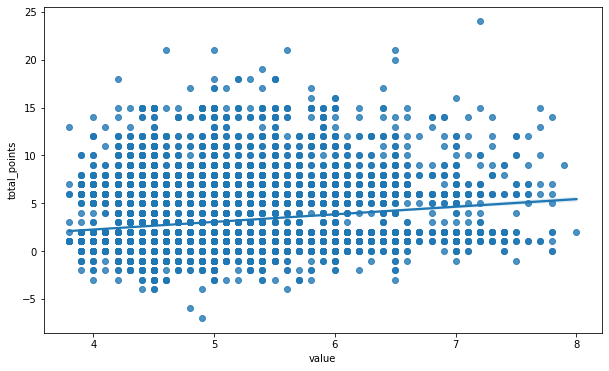

In [31]:
#scale the value column to reflect prices in the game
df['value'] = df['value'] / 10

plt.figure(figsize=(10,6))
sns.regplot(x='value',y='total_points',data=df)
plt.show()

As we can see there is very little correlation between value and total_points. 

To check this lets look at total_points per season for each team's defenders.

In [32]:
players = df[['name', 'Season', 'total_points', 'value']]
players.head()

name   Season  total_points  value
0         Alex Nicolao Telles  2021-22             1    5.0
4           Takehiro Tomiyasu  2021-22             1    4.6
6               Harry Maguire  2021-22             1    5.4
14            Victor Lindelöf  2021-22             1    4.8
16  José Diogo Dalot Teixeira  2021-22             1    4.4

In [33]:
players = players.groupby(['name', 'Season']).agg({'total_points': 'sum', 'value': 'mean'})
players.reset_index(inplace=True)
players.sort_values(by='total_points')

name   Season  total_points     value
431            Kayne Ramsay  2020-21            -3  4.000000
591             Neil Taylor  2020-21            -1  4.200000
238             Eric Bailly  2021-22            -1  4.900000
565          Michael Hector  2020-21             0  4.425000
30         Allan Tchaptchet  2020-21             0  4.000000
..                      ...      ...           ...       ...
40         Andrew Robertson  2019-20           181  6.983333
750  Trent Alexander-Arnold  2018-19           185  5.262069
771         Virgil van Dijk  2018-19           208  6.281579
751  Trent Alexander-Arnold  2019-20           210  7.426316
39         Andrew Robertson  2018-19           213  6.550000

[801 rows x 4 columns]

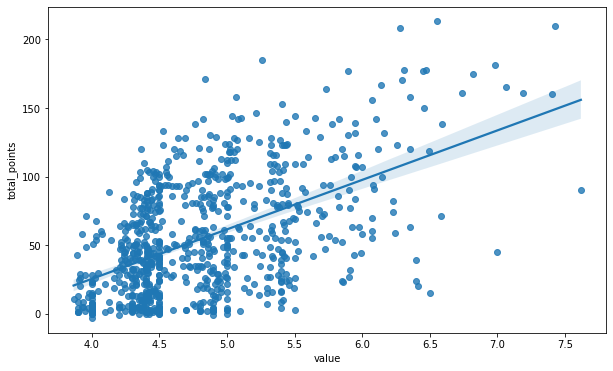

In [34]:
plt.figure(figsize=(10,6))
sns.regplot(x='value',y='total_points',data=players)
plt.show()

We can see that over the course of a season that there is an increase in total points with price. This indicates that is worth spending high on a few defenders if you can get it right!

Let's investigate if it matters which team you get your defenders from.

In [37]:
teams = df[['team', 'Season', 'total_points', 'value']]
teams.head()

team   Season  total_points  value
0   Man Utd  2021-22             1    5.0
4   Arsenal  2021-22             1    4.6
6   Man Utd  2021-22             1    5.4
14  Man Utd  2021-22             1    4.8
16  Man Utd  2021-22             1    4.4

In [38]:
teams = teams.groupby(['team', 'Season']).agg({'total_points': 'sum', 'value': 'mean'})
teams.reset_index(inplace=True)
teams.sort_values(by='total_points')

team   Season  total_points     value
81         Norwich  2017-18             5  4.200000
82         Norwich  2018-19             6  4.800000
88   Sheffield Utd  2018-19            22  4.328571
84         Norwich  2020-21            31  4.761538
110      West Brom  2018-19            43  3.890000
..             ...      ...           ...       ...
30         Chelsea  2020-21           718  5.223243
116       West Ham  2020-21           740  4.744907
58       Liverpool  2018-19           744  5.780851
64        Man City  2018-19           782  5.625373
66        Man City  2020-21           789  5.652604

[122 rows x 4 columns]

C:\Users\GV147BE\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_points', ylabel='Density'>

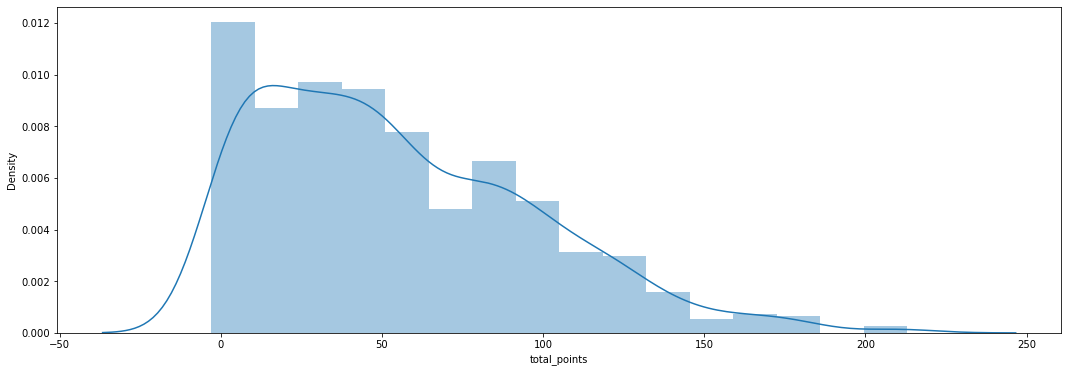

In [39]:
plt.figure(figsize=(18,6))
sns.distplot(players['total_points'])

It looks like that most teams defenders get a similar total over the course of a season, apart from a few. It could be worth considering backing historically good defences like Man City and Liverpool. 

Let's have a look at how stable the ict_index variable is, as when inputting to the model we will have to predict this by aggregating player past performance.

C:\Users\GV147BE\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ict_index', ylabel='Density'>

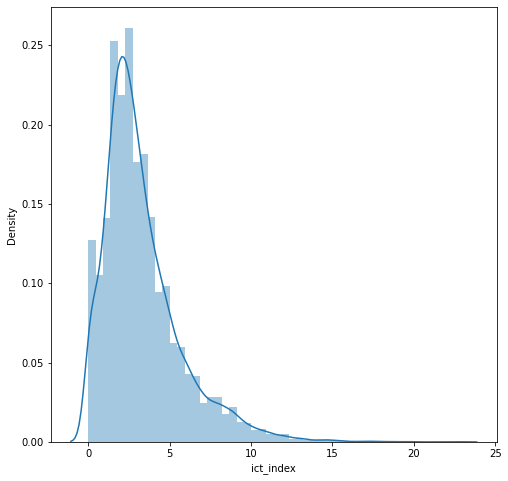

In [41]:
plt.figure(figsize=(8,8))
sns.distplot(df['ict_index'])

This variable has a normal distribution this could mean it has good discriminatory power so we will leave this variable in.

Let's have a look at selected vs total_points, i.e. are the general public good at choosing defenders?

<AxesSubplot:xlabel='total_points', ylabel='selected'>

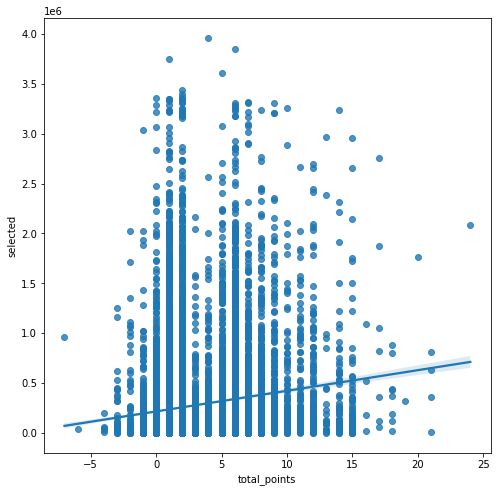

In [43]:
plt.figure(figsize=(8,8))
sns.regplot(x='total_points', y='selected', data=df)

There is a slight correlation but in general the public is not good at selecting defenders.

Finally let's look at saves vs bps

<AxesSubplot:xlabel='bps', ylabel='total_points'>

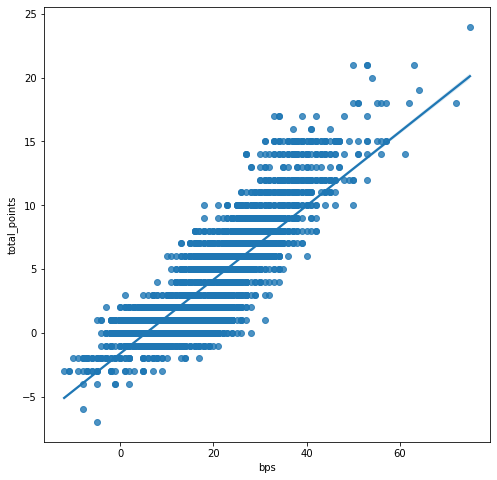

In [45]:
plt.figure(figsize=(8,8,))
sns.regplot(x='bps', y='total_points', data=df)

As expected this shows good correlation. This is interesting as it is such a powerful predictor but there are only 3 players per match that receive bonus points.

<h1>Let's save the datasets again based on what we found out</h1>

In [47]:
data_path = os.getcwd() + "\Data\Transformed_Data"

defenders_correlated = pd.read_csv(data_path + "\\defenders_correlated.csv")
defenders_correlated = defenders_correlated[defenders_correlated['minutes']!=0]
defenders_correlated.to_csv(data_path + "\\defenders_correlated.csv", index=False)

defenders = pd.read_csv(data_path + "\\defenders.csv")
defenders = defenders[defenders['minutes']!=0]
defenders.to_csv(data_path + "\\defenders.csv", index=False)

print(len(defenders_correlated))
print(len(defenders))

14645
14645
